# I part -> Data Cleaning

### 1. Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#recipe_rating = pd.read_csv('data/interactions_validation.csv')
raw_interactions = pd.read_csv('secret/data/RAW_interactions.csv')
raw_recipes = pd.read_csv('secret/data/RAW_recipes.csv')

### 2. First look at the data

In [3]:
raw_interactions.shape

(1132367, 5)

In [4]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [5]:
raw_recipes.shape

(231637, 12)

In [6]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


### 3. Dealing with missing values and cleaning the data

In [7]:
raw_recipes.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [8]:
#looking on the missing value row
raw_recipes[raw_recipes['name'].isna()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [9]:
#searching in ingredients to find out the name of recipe
raw_recipes[raw_recipes['name'].isna()]['ingredients'].tolist()

["['lemon', 'honey', 'horseradish mustard', 'garlic clove', 'dried parsley', 'dried basil', 'dried thyme', 'garlic salt', 'black pepper', 'olive oil']"]

In [3]:
#filling missing value in name column
raw_recipes.loc[raw_recipes['name'].isna(), 'name'] = 'Salad Dressing'

In [7]:
raw_interactions.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [4]:
# Apply lowercase to all string values in the DataFrame
raw_interactions = raw_interactions.applymap(lambda s: s.lower() if type(s) == str else s)
raw_recipes = raw_recipes.applymap(lambda s: s.lower() if type(s) == str else s)

In [5]:
# Remove unwanted characters from the 'steps' column
unwanted_chars = "[]\"/\\'"
raw_recipes['steps'] = raw_recipes['steps'].apply(lambda x: x.translate(str.maketrans('', '', unwanted_chars)))

In [6]:
# Convert the list of strings in the 'steps' column to a numbered list of strings
raw_recipes['steps'] = raw_recipes['steps'].apply(lambda x:
             [f"{i}. {step.strip()}" for i, step in enumerate(x.split(","), start=1)])
# Convert the numbered list of strings back to a single string
raw_recipes['steps'] = raw_recipes['steps'].apply(lambda x: ",".join(x))

In [7]:
# replacing ',' by empty space
raw_recipes['steps'] = raw_recipes['steps'].str.replace(',', ' ')

### 4. Looking for duplciates

No duplicates

In [8]:
#searching for duplicates
duplicat = raw_interactions.duplicated(keep=False)
len(duplicat)

for row in duplicat.keys():
    if row == True:
        print(row, duplicat[row])

1 False


In [9]:
#searching for duplicates
duplicat = raw_recipes.duplicated(keep=False)
len(duplicat)

for row in duplicat.keys():
    if row == True:
        print(row, duplicat[row])

1 False


### 5. Dropping columns

In [10]:
print(raw_recipes.columns)
print(raw_interactions.columns)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')


In [10]:
recipes = raw_recipes.drop(['contributor_id', 'tags'], axis=1)
rating = raw_interactions.drop(['user_id','review'],  axis=1)

### 6. Searching for high correlation and low variance

 no high correlation columns
 
 no low variance columns

In [15]:
# Find the Column Collinearity
# # Create correlation matrix
corr_matrix = rating.corr().abs()
# # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# # Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)
print(len(to_drop))

[]
0


C:\Users\user\AppData\Local\Temp\ipykernel_10104\2514529888.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [11]:
# Find the Column Collinearity
# # Create correlation matrix
corr_matrix = recipes.corr().abs()
# # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# # Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)
print(len(to_drop))

[]
0


C:\Users\user\AppData\Local\Temp\ipykernel_12164\2728084183.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [16]:
#part for repeatable values
low_variance = [] #creating a list to contain the names of columns

for col in recipes._get_numeric_data(): #loop through all numeric values
    minimum = np.min(recipes[col]) #takes the min 
    ninety_perc = np.percentile(recipes[col], 90) #takes the 90th percentile
    if ninety_perc == minimum: #if they are equal it means that 90% of values are the same
     low_variance.append(col) #appends name of this columns

print(low_variance) #not found

[]


In [12]:
#part for repeatable values
low_variance = [] #creating a list to contain the names of columns

for col in rating._get_numeric_data(): #loop through all numeric values
    minimum = np.min(rating[col]) #takes the min 
    ninety_perc = np.percentile(rating[col], 90) #takes the 90th percentile
    if ninety_perc == minimum: #if they are equal it means that 90% of values are the same
     low_variance.append(col) #appends name of this columns

print(low_variance) #not found

[]


### 7. Splitting columns for nutrition type

In [10]:
#creating columns for nutrition and fill from 'nutrition' column
recipes[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = recipes.nutrition.str.split(",",expand=True) 
#removing square brackets from columns 
recipes[['calories', 'carbohydrates']] = recipes[['calories', 'carbohydrates']].applymap(lambda x: x.replace('[','').replace(']',''))
# making nutri columns float
recipes[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype('float')
#drop the nutri column
recipes.drop(['nutrition'], axis =1, inplace=True)

### 8. Creating food type

In [11]:
# creating column 'food type'
recipes['food_types'] = ''
recipes['food_types'] = recipes['food_types'].astype('str')

In [14]:
#create list of unique ingredients
unique_ingredients = []
for ingredients in recipes['ingredients'].unique():
    for ingredient in ingredients.split(', '):
        if ingredient not in unique_ingredients:
            unique_ingredients.append(ingredient)
len(unique_ingredients)

29580

In [15]:
#looking for duplicates
unique_ingredients_set = list(set(unique_ingredients))
if len(unique_ingredients_set) == len(unique_ingredients):
    print("There are no duplicates in the list.")
else:
    print("There are duplicates in the list.")

There are no duplicates in the list.


In [14]:
# Remove unwanted characters from the beginning and end of each element
for i in range(len(unique_ingredients)):
    ingredient = unique_ingredients[i]
    ingredient = ingredient.strip("[']") # Remove ' and [ from beginning and end of each element
    ingredient = ingredient.replace('"', "") # Remove backslashes
    unique_ingredients[i] = ingredient

len(unique_ingredients)


29580

In [23]:
#searching for gluten-free recipes
gluten_free_recipes = recipes[recipes['ingredients'].str.contains('gluten-free', case=False)]
if len(gluten_free_recipes) > 0:
    print(f'There are {len(gluten_free_recipes)} gluten-free recipes in the dataset.')
else:
    print('There are no gluten-free recipes in the dataset.')


There are 305 gluten-free recipes in the dataset.


In [15]:
#creating filter for recipes which may contain gluten
gluten_ingredients = ['wheat flour', 'all-purpose flour', 'breadcrumbs', 'bread', 'barley','rye', 'malt','couscous', 'bulgur', 'spelt', 'farro' , 'cookies']
count_gl= 0
count_nogl = 0
for i in range(len(recipes['ingredients'])):
    if any(gluten_ingredient in recipes['ingredients'][i] for gluten_ingredient in gluten_ingredients):
        count_gl +=1
    elif any(word in recipes['ingredients'][i] for phrase in gluten_ingredients for word in phrase.split()): 
        count_gl += 1
    else:
        count_nogl += 1
print(f'So we have {count_nogl} gluten-free recipies, and {count_gl} recepies containing gluten')

So we have 155581 gluten-free recipies, and 76056 recepies containing gluten


In [17]:
print(f"Number of recipes in DataFrame: {len(recipes)}")
print(f"Number of empty 'food types': {len(recipes[recipes['food_types'] == ''])}")

Number of recipes in DataFrame: 231637
Number of empty 'food types': 231637


In [18]:
#looping through data to check for type of food 'veg'
for i in recipes['ingredients'].index:
    if 'eggs' not in recipes['ingredients'][i]:
        if 'ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]:
            recipes['food_types'][i] = 'Veg dessert'
    elif 'eggs' in recipes['ingredients'][i]:
        if 'ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]:
            recipes['food_types'][i] = 'Non-Veg dessert'

C:\Users\user\AppData\Local\Temp\ipykernel_18400\240486438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i] = 'Veg dessert'
C:\Users\user\AppData\Local\Temp\ipykernel_18400\240486438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i] = 'Non-Veg dessert'


In [19]:
print(f"Number of recipes in DataFrame: {len(recipes)}")
print(f"Number of empty 'food types': {len(recipes[recipes['food_types'] == ''])}")

Number of recipes in DataFrame: 231637
Number of empty 'food types': 216943


In [20]:
#looping through data to check for type of food 'gluten free'
for i in recipes['ingredients'].index:
    if any(gluten_ingredient in recipes['ingredients'][i] for gluten_ingredient in gluten_ingredients):
        continue
    elif any(word in recipes['ingredients'][i] for phrase in gluten_ingredients for word in phrase.split()): 
        continue
    else:
        if recipes['food_types'][i] == '':
                  recipes.loc[i, 'food_types'] = 'Gluten-Free'
        else:
            recipes.loc[i, 'food_types'] += ', Gluten-Free'

In [49]:
print(f"Number of recipes in DataFrame: {len(recipes)}")
print(f"Number of empty 'food types': {len(recipes[recipes['food_types'] == ''])}")

Number of recipes in DataFrame: 231637
Number of empty 'food types': 68687


In [21]:
#creating 'Low-calories' type by searching range of calories between  20 and 300.
for i in recipes.index:
    if (recipes['food_types'][i] == '' or 'Low-calories' not in recipes['food_types'][i]) and (20 < float(recipes['calories'][i]) < 300):
        if recipes['food_types'][i] == '':
            recipes.loc[i, 'food_types'] = 'Low-calories'
        else:
            recipes.loc[i, 'food_types'] += ', Low-calories'

In [53]:
print(f"Number of recipes in DataFrame: {len(recipes)}")
print(f"Number of empty 'food types': {len(recipes[recipes['food_types'] == ''])}")

Number of recipes in DataFrame: 231637
Number of empty 'food types': 40014


In [22]:
non_vegan_ingredients = ['beef', 'pork', 'lamb', 'goat', 'veal', 'chicken', 'turkey', 'duck', 'goose', 'quail',
                          'pigeon', 'pheasant', 'fish', 'shellfish', 'shrimp', 'lobster', 'crab', 'clams',
                            'mussels', 'squid', 'octopus', 'anchovies', 'sardines', 'tuna', 'salmon', 'trout', 
                            'cod', 'haddock', 'catfish', 'tilapia', 'mahi-mahi', 'swordfish', 'snapper', 'bass',
                              'ham', 'bacon', 'sausage', 'pepperoni', 'prosciutto', 'salami', 'mortadella', 
                              'bologna', 'hot dogs', 'chicken broth', 'beef broth', 'pork broth', 'fish sauce',
                                'oyster sauce', 'hoisin sauce', 'Worcestershire sauce', 'anchovy paste', 
                                'butter', 'milk', 'cheese', 'yogurt', 'cream', 'sour cream', 'mayonnaise',
                                  'eggs', 'honey', 'gelatin']


In [23]:
print(f"Number of recipes in DataFrame: {len(recipes)}")
print(f"Number of empty 'food types': {len(recipes[recipes['food_types'] == ''])}")

for i in recipes.index:
    if recipes['food_types'][i] == '' and any(ingredient in recipes['ingredients'][i].lower() for ingredient in non_vegan_ingredients):
        recipes.loc[i, 'food_types'] = 'Balanced'
        #print(f"Recipe {i} is assigned 'Balanced' food type.")


Number of recipes in DataFrame: 231637
Number of empty 'food types': 40014


In [56]:
print(f"Number of recipes in DataFrame: {len(recipes)}")
print(f"Number of empty 'food types': {len(recipes[recipes['food_types'] == ''])}")

Number of recipes in DataFrame: 231637
Number of empty 'food types': 2533


In [24]:
for i in recipes.index:
    if recipes['food_types'][i] == '':
        recipes['food_types'][i]='Veg'

C:\Users\user\AppData\Local\Temp\ipykernel_18400\2471839227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Veg'


In [25]:
recipes['food_types'].value_counts()

Gluten-Free                                   76350
Gluten-Free, Low-calories                     71906
Balanced                                      37481
Low-calories                                  28673
Veg dessert, Gluten-Free, Low-calories         3392
Veg dessert, Gluten-Free                       2702
Veg                                            2533
Non-Veg dessert                                2118
Veg dessert, Low-calories                      2062
Non-Veg dessert, Low-calories                  1813
Veg dessert                                    1376
Non-Veg dessert, Gluten-Free                    879
Non-Veg dessert, Gluten-Free, Low-calories      352
Name: food_types, dtype: int64

# Part II - Exploratory Analysis

### 9. Find the outliers for recipes

In [60]:
recipes.dtypes

name             object
id                int64
minutes           int64
submitted        object
n_steps           int64
steps            object
ingredients      object
n_ingredients     int64
calories         object
total fat        object
sugar            object
sodium           object
protein          object
saturated fat    object
carbohydrates    object
food_types       object
dtype: object

In [26]:
recipes['id'] = recipes['id'].astype('object')
recipes['id'].astype('object')
cols = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
recipes[cols] = recipes[cols].apply(pd.to_numeric, errors='coerce')

In [126]:
recipes.describe().round(2)

,minutes,n_steps,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
count,2.316370e+05,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00
mean,9.398550e+03,9.77,9.05,473.94,36.08,84.30,30.15,34.68,45.59,15.56
std,4.461963e+06,6.00,3.73,1189.71,77.80,800.08,131.96,58.47,98.24,81.82
min,0.000000e+00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.000000e+01,6.00,6.00,174.40,8.00,9.00,5.00,7.00,7.00,4.00
50%,4.000000e+01,9.00,9.00,313.40,20.00,25.00,14.00,18.00,23.00,9.00
75%,6.500000e+01,12.00,11.00,519.70,41.00,68.00,33.00,51.00,52.00,16.00
max,2.147484e+09,145.00,43.00,434360.20,17183.00,362729.00,29338.00,6552.00,10395.00,36098.00


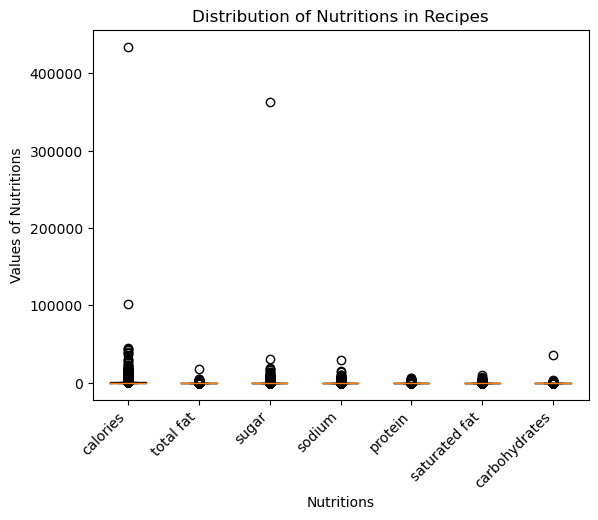

In [20]:
#chacking for outliers
import matplotlib.pyplot as plt
xtick_positions = range(1, 8)
xtick_labels = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
# Create a box plot of the 'nutrition' columns
plt.boxplot(recipes[['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']])

# Add labels and title
plt.xlabel('Nutritions')
plt.ylabel('Values of Nutritions')
plt.title('Distribution of Nutritions in Recipes')
plt.gca().set_xticklabels(xtick_labels, rotation=45, ha='right')

# Show the plot# Show the plot
plt.show()


Text(0.5, 1.0, 'Distribution of Ingredient in Recipes')

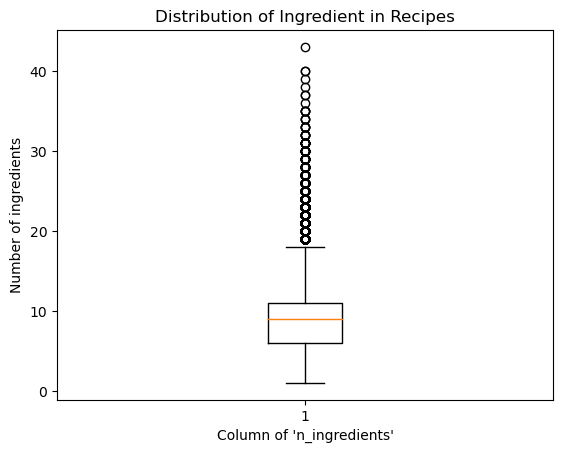

In [38]:
plt.boxplot(recipes['n_ingredients'])
# Add labels and title
plt.xlabel("Column of 'n_ingredients'")
plt.ylabel('Number of ingredients')
plt.title('Distribution of Ingredient in Recipes')

In [27]:
if recipes is not None:
    # check the column names and data types
    print(recipes.dtypes)

    try:
        # drop the outliers
        recipes = recipes.drop(recipes[recipes['sugar'] > 350000].index, axis=0)
        recipes = recipes.drop(recipes[recipes['sodium'] > 20000].index, axis=0)
        recipes = recipes.drop(recipes[recipes['protein'] > 4500].index, axis=0)
        recipes = recipes.drop(recipes[recipes['saturated fat'] > 10000].index, axis=0)
        recipes = recipes.drop(recipes[recipes['total fat'] > 17000].index, axis=0)
        recipes = recipes.drop(recipes[recipes['n_ingredients'] > 25].index, axis=0)


        # print the number of rows remaining
        print(f"{len(recipes)} rows remaining in the DataFrame.")
    except KeyError as e:
        print(f"Error: {e} is not a valid column name.")
    except Exception as e:
        print(f"Error: {e}")
else:
    print("Error: DataFrame 'recipes' is not defined.")


name              object
id                object
minutes            int64
submitted         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
calories         float64
total fat        float64
sugar            float64
sodium           float64
protein          float64
saturated fat    float64
carbohydrates    float64
food_types        object
dtype: object
231396 rows remaining in the DataFrame.


In [63]:
recipes.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
minutes,231396.0,9408.07,4464286.01,0.0,20.0,40.0,65.0,2.147484e+09
n_steps,231396.0,9.75,5.97,0.0,6.0,9.0,12.0,1.450000e+02
n_ingredients,231396.0,9.03,3.68,1.0,6.0,9.0,11.0,2.500000e+01
calories,231396.0,470.54,732.71,0.0,174.2,313.2,519.2,4.560900e+04
total fat,231396.0,35.90,67.43,0.0,8.0,20.0,41.0,3.464000e+03
sugar,231396.0,82.58,265.90,0.0,9.0,25.0,68.0,3.026000e+04
sodium,231396.0,29.94,116.82,0.0,5.0,14.0,33.0,1.466400e+04
protein,231396.0,34.54,53.53,0.0,7.0,18.0,51.0,4.356000e+03
saturated fat,231396.0,45.44,94.28,0.0,7.0,23.0,52.0,6.875000e+03
carbohydrates,231396.0,15.38,32.48,0.0,4.0,9.0,16.0,3.007000e+03


### 10. Creating new features

In [28]:
#creating mean rating column
mean_rating : pd.DataFrame=rating.groupby(['recipe_id']).agg({'rating' :'mean'})
mean_rating=mean_rating.reset_index()
mean_rating.rename(columns={'rating':'rating_mean'}, inplace=True)
ratings_new=pd.merge(rating, mean_rating, on='recipe_id')
ratings_new.head()

,recipe_id,date,rating,rating_mean
0,40893,2003-02-17,4,4.5
1,40893,2011-12-21,5,4.5
2,44394,2002-12-01,4,4.0
3,85009,2010-02-27,5,5.0
4,85009,2011-10-01,5,5.0


### 11. Checking unique ID connection between 2 datasets

In [29]:
# Group the second dataframe by recipe_id and aggregate the values as a list
rating_agg = ratings_new.groupby('recipe_id').agg({'rating': 'mean'}).reset_index()

# Perform a left join on the 'id' and 'recipe_id' columns
recipes = pd.merge(recipes, rating_agg, left_on='id', right_on='recipe_id', how='left')

#dropping recipe_id column
recipes = recipes.drop(['recipe_id'], axis = 1)
# Print the merged dataframe
len(recipes)

231396

In [30]:
recipes.head()

,name,id,minutes,submitted,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,food_types,rating
0,arriba baked winter squash mexican style,137739,55,2005-09-16,11,1. make a choice and proceed with recipe 2. de...,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,"Gluten-Free, Low-calories",5.0
1,a bit different breakfast pizza,31490,30,2002-06-17,9,1. preheat oven to 425 degrees f 2. press doug...,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,"Gluten-Free, Low-calories",3.5
2,all in the kitchen chili,112140,130,2005-02-25,6,1. brown ground beef in large pot 2. add chopp...,this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,"Gluten-Free, Low-calories",4.0
3,alouette potatoes,59389,45,2003-04-14,11,1. place potatoes in a large pot of lightly sa...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Gluten-Free,4.5
4,amish tomato ketchup for canning,44061,190,2002-10-25,5,1. mix all ingredients& boil for 2 1 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Gluten-Free,5.0


In [44]:
recipes.isna().sum()

name             0
id               0
minutes          0
submitted        0
n_steps          0
steps            0
ingredients      0
n_ingredients    0
calories         0
total fat        0
sugar            0
sodium           0
protein          0
saturated fat    0
carbohydrates    0
food types       0
recipe_id        0
rating           0
dtype: int64

### 12. Splitting ingredients column

In [31]:
#Creating unique ingredient df
unique_ingredient = pd.DataFrame(unique_ingredients, columns=['Ingredient'])
ingr_df = unique_ingredient.reset_index(drop=True)
ingr_df.index += 1

# Generate unique integer IDs for each row
ingr_df['ID'] = range(1, len(ingr_df) + 1)
# Filter out duplicate ingredients in ingr_df
ingr_df = ingr_df.drop_duplicates(subset='Ingredient')
ingr_df.head()

,Ingredient,ID
1,winter squash,1
2,mexican seasoning,2
3,mixed spice,3
4,honey,4
5,butter,5


In [32]:
#searching for duplicates
duplica_ingr = ingr_df.duplicated(keep=False)
len(duplica_ingr)

for row in duplica_ingr.keys():
    if row == True:
        print(row, duplica_ingr[row])

1 False


### 13. Preparing and Exporting to MySQL

In [33]:
rec_splitted = recipes[['id', 'ingredients']]
# Split the ingredients column into a list of ingredients
rec_splitted['ingredients'] = rec_splitted['ingredients'].str.split(',')

# Explode the ingredients column to create a new row for each ingredient
rec_splitted = rec_splitted.explode('ingredients')
rec_splitted = rec_splitted.reset_index(drop=True)
#rec_splitted['ingredients'] = rec_splitted['ingredients'].str.split(',')
rec_splitted['ingredients'] = rec_splitted['ingredients'].apply(lambda x: x.strip('[]').strip("''"))
rec_splitted['ingredients'] = rec_splitted['ingredients'].apply(lambda x: x.strip().strip("'"))
rec_splitted['ingredients'] = rec_splitted['ingredients'].apply(lambda x: x.strip().strip('"'))


rec_splitted.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18400\1796935899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_splitted['ingredients'] = rec_splitted['ingredients'].str.split(',')


,id,ingredients
0,137739,winter squash
1,137739,mexican seasoning
2,137739,mixed spice
3,137739,honey
4,137739,butter


In [34]:
# Merge dataframes based on 'ingredients' column
merged_ingr = pd.merge(rec_splitted, ingr_df, how='left', left_on='ingredients', right_on='Ingredient')

# Drop the duplicate 'Ingredient' column
merged_ingr = merged_ingr.drop(columns=['Ingredient', 'ingredients'])
merged_ingr.head()

,id,ID
0,137739,1.0
1,137739,2.0
2,137739,3.0
3,137739,4.0
4,137739,5.0


In [75]:
# Filter merged_df to only include rows with 'honey' in the 'ingredients' column
#honey_recipes = merged_ingr[merged_ingr['ingredients'].str.contains('honey', case=False)]

# Print the filtered dataframe
#print(honey_recipes)

In [35]:
nutrition = recipes[['id','calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']]
recipe_to_csv = recipes[['id', 'name', 'minutes', 'steps', 'n_steps', 'n_ingredients', 'rating', 'food_types']]
#ingr_df
food_type = recipes['food_types'].unique()
food_type = pd.DataFrame(food_type)
#food_type['food_types'] = rec_rating['food types']
#merged_df


In [135]:
recipe_to_csv.head()

,id,name,minutes,steps,n_steps,n_ingredients,rating,food_types
0,137739,arriba baked winter squash mexican style,55,1. make a choice and proceed with recipe 2. de...,11,7,5.0,"Gluten-Free, Low-calories"
1,31490,a bit different breakfast pizza,30,1. preheat oven to 425 degrees f 2. press doug...,9,6,3.5,"Gluten-Free, Low-calories"
2,112140,all in the kitchen chili,130,1. brown ground beef in large pot 2. add chopp...,6,13,4.0,"Gluten-Free, Low-calories"
3,59389,alouette potatoes,45,1. place potatoes in a large pot of lightly sa...,11,11,4.5,Gluten-Free
4,44061,amish tomato ketchup for canning,190,1. mix all ingredients& boil for 2 1 2 hours ...,5,8,5.0,Gluten-Free


In [36]:
# rename the column using the rename() method
food_type = food_type.rename(columns={0: 'food_type'})
# Generate unique integer IDs for each row
food_type['id_food_type'] = range(1, len(food_type) + 1)
food_type.head()

,food_type,id_food_type
0,"Gluten-Free, Low-calories",1
1,Gluten-Free,2
2,Veg dessert,3
3,Balanced,4
4,Low-calories,5


In [37]:
recipes_to_csv = pd.merge(recipe_to_csv, food_type, how='left', left_on='food_types', right_on='food_type')

In [38]:
recipes_to_csv=recipes_to_csv.drop(columns=['food_types',	'food_type'])

In [39]:
#searching for duplicates
duplica_rec = merged_ingr.duplicated(keep=False)
len(duplica_rec)

for row in duplica_rec.keys():
    if row == True:
        print(row, duplica_rec[row])

1 False


In [155]:
recipe_to_csv.shape

(231396, 8)

In [40]:
#cleaning ingredient column in main table
recipes['ingredients'] = recipes['ingredients'].apply(lambda x: x.strip('[]').strip("''"))
recipes['ingredients'] = recipes['ingredients'].apply(lambda x: x.replace("'", ""))
recipes['ingredients'] = recipes['ingredients'].apply(lambda x: x.strip().strip('"'))


In [88]:
nutrition.to_csv('secret/csv_for_mySQL/nutrition.csv', index=False)
recipe_to_csv.to_csv('secret/csv_for_mySQL/recipe.csv', index = False)
ingr_df.to_csv('secret/csv_for_mySQL/unique_ingr.csv', index=False)
food_type.to_csv('secret/csv_for_mySQL/food_types.csv', index=False)
merged_ingr.to_csv('secret/csv_for_mySQL/recipe_ingredient.csv', index = False)
recipes.to_csv('secret/csv_for_mySQL/recipe_with_discr.csv', index = False)

In [90]:
#column renaming
merged_ingr=merged_ingr.rename(columns={'id':'recipe_id', 'ID':'ingredient_id'})
nutrition=nutrition.rename(columns={'id':'recipe_id', 'total fat':'total_fat', 'saturated fat':'saturated_fat'})
recipes_to_csv = recipes_to_csv.rename(columns={'id':'recipe_id', 'name':'recipe_name'})
ingr_df=ingr_df.rename(columns={'ID':'ingredient_id', 'Ingredient':'ingredient_name'})

In [83]:
import pymysql.cursors
from sqlalchemy import create_engine, MetaData
from sqlalchemy.schema import CreateTable
from sqlalchemy import text

In [85]:
#prompt user to enter MySQL root password
import getpass

sql_pass = getpass.getpass()
#create connection tring and angine to connect to MySQL database
connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/recipes_recomm'
engine = create_engine(connection_string)

In [135]:
# export the tables to MySQL
merged_ingr.to_sql('recipes_ingredients',engine, 'recipes_recomm', if_exists='replace', index=False)
nutrition.to_sql('recipe_nutrition',engine, 'recipes_recomm', if_exists='replace', index=False)
recipes_to_csv.to_sql('recipe_main',engine, 'recipes_recomm', if_exists='replace', index=False)
ingr_df.to_sql('ingredients_unique',engine, 'recipes_recomm', if_exists='replace', index=False)
food_type.to_sql('food_class',engine, 'recipes_recomm', if_exists='replace', index=False)

13

In [86]:
# Create metadata object
metadata = MetaData()

# Reflect database schema into metadata
metadata.reflect(bind=engine)

# Extract SQL script for each table and write to file
with open('database_script.sql', 'w') as f:
    for table_name, table in metadata.tables.items():
        create_table = CreateTable(table)
        f.write(str(create_table.compile(engine)) + ';\n\n')

### 14. EDA

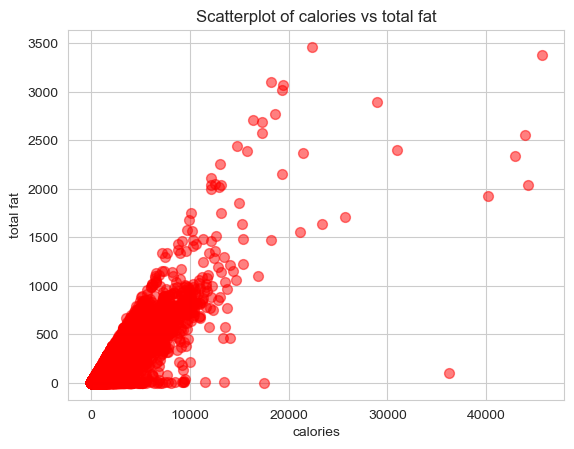

In [173]:
recipes.plot(kind='scatter', x='calories', y='total fat', s=50, marker='o', color='red', alpha=0.5)
plt.title('Scatterplot of calories vs total fat')
plt.show()

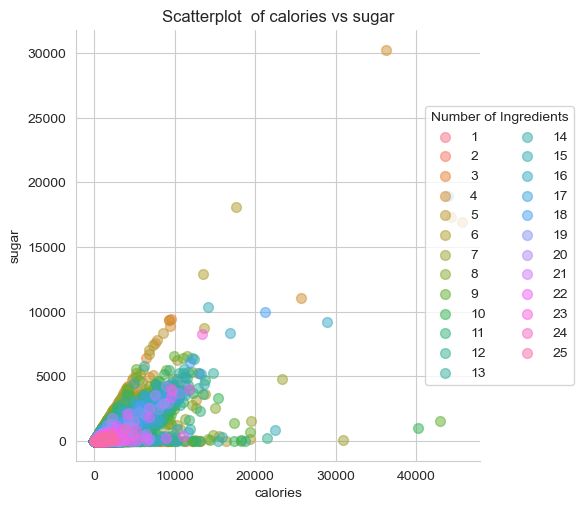

In [47]:
import seaborn as sns
sns.set_style('whitegrid')
sns.FacetGrid(recipes, hue='n_ingredients', height = 5,  legend_out=False).map(plt.scatter, 'calories', 'sugar', s=50, alpha=0.5).add_legend()
plt.title('Scatterplot  of calories vs sugar')
# Set the location and appearance of the legend
plt.legend(title='Number of Ingredients', loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=2, fontsize=10)

plt.show()

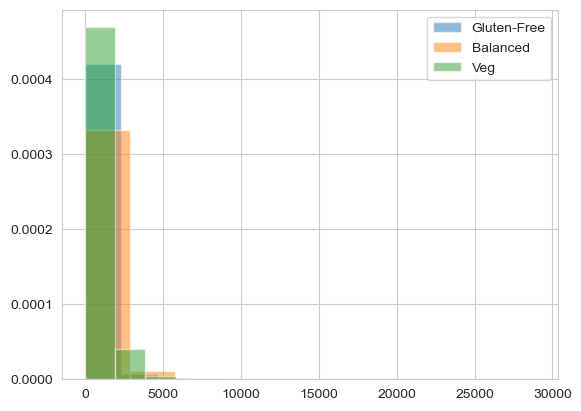

In [132]:
plt.hist(recipes.calories[recipes['food types']=='Gluten-Free'], label='Gluten-Free', density=True, alpha=.5)
plt.hist(recipes.calories[recipes['food types']=='Balanced'], label='Balanced', density=True, alpha=.5)
plt.hist(recipes.calories[recipes['food types']=='Veg'], label='Veg', density=True, alpha=.5)
plt.legend()
plt.show()

### A bar chart to show the number of recipes in each food category

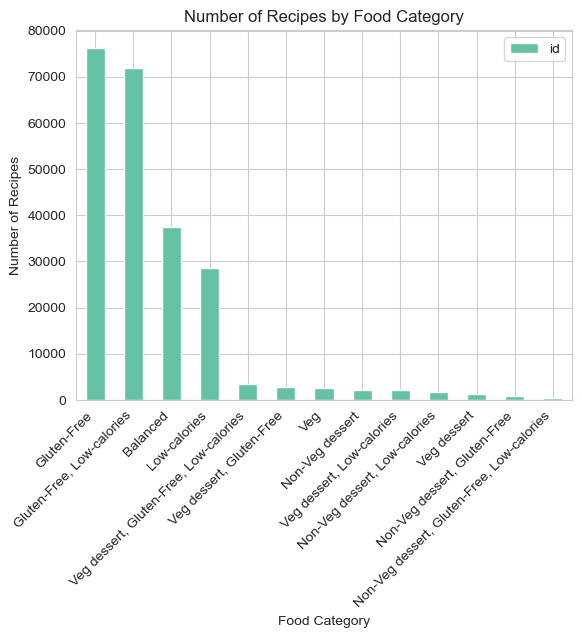

In [45]:
# Create a groupby object by food_types and count the number of occurrences
food_count = recipes.groupby('food_types')['id'].count().sort_values(ascending=False) # Sort values in descending order
sns.set_palette('Set2')

# Create a bar chart using matplotlib
fig, ax = plt.subplots()
food_count.plot(kind='bar', ax=ax)

# Set chart title and axis labels
ax.set_title('Number of Recipes by Food Category')
ax.set_xlabel('Food Category')
ax.set_ylabel('Number of Recipes')
ax.legend()
# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Display the chart
plt.show()

### A Line chart to show the rating of the recipe changes as the cooking time increases

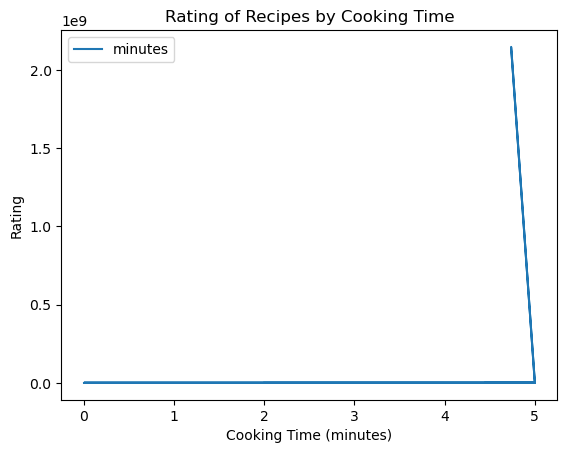

In [99]:
# Create a line chart using matplotlib
fig, ax = plt.subplots()
recipes.plot(x='rating', y='minutes', kind='line', ax=ax)

# Set chart title and axis labels
ax.set_title('Rating of Recipes by Cooking Time')
ax.set_xlabel('Cooking Time (minutes)')
ax.set_ylabel('Rating')

# Display the chart
plt.show()

### A histogram to show the frequency distribution of the number of ingredients used in the recipes

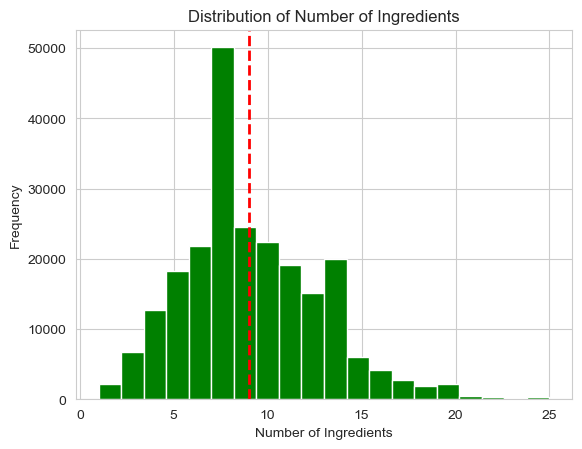

In [171]:
# Create a histogram using matplotlib
fig, ax = plt.subplots()
recipes['n_ingredients'].plot(kind='hist', ax=ax, bins = 20, color='g')
ax.axvline(x=recipes['n_ingredients'].mean(), color='red', linestyle='dashed', linewidth=2)

# Set chart title and axis labels
ax.set_title('Distribution of Number of Ingredients')
ax.set_xlabel('Number of Ingredients')
ax.set_ylabel('Frequency')

# Display the chart
plt.show()

### A stacked bar chart to show the breakdown of nutrient content by food category

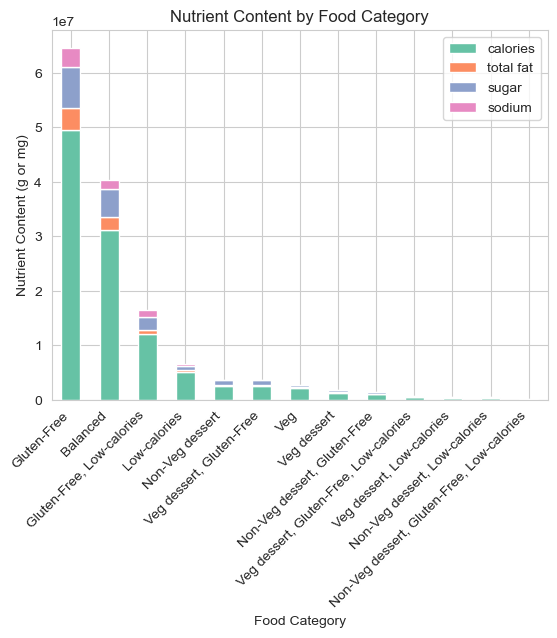

In [52]:
# Group data by food_types and sum nutrient columns
nutrients = ['calories', 'total fat', 'sugar', 'sodium']
nutrient_totals = recipes.groupby('food_types')[nutrients].sum().sort_values(by='calories',ascending=False) # Sort values in descending order
sns.set_palette('Set2')

# Create a stacked bar chart using matplotlib
fig, ax = plt.subplots()
nutrient_totals.plot(kind='bar', stacked=True, ax=ax)

# Set chart title and axis labels
ax.set_title('Nutrient Content by Food Category')
ax.set_xlabel('Food Category')
ax.set_ylabel('Nutrient Content (g or mg)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the chart
plt.show()

### A heatmap of numeric features

<AxesSubplot:>

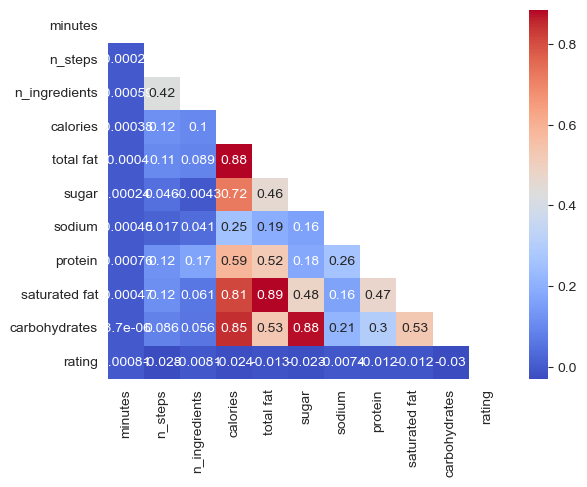

In [178]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr = recipes.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap with the lower triangle masked
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)
